## Classification of Curves

The following notebook shows the weather curves of different world cities and classify them according to the characterstic of curves. It covers the concept of- 
* Functinal data analysis
* Principal component analysis
* K-means

#### Libraries used - 
* numpy - for numerical analysis
* urlib2 - getting weather data online
* scipy - for scientific analysis of curves
* matplotlib - for plotting

In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
stationID = {}
with open('stationID.csv') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        stationID[row[0]] = row[1]

Most of the cities are from Canada, US and India. It is mapped to the respective airport code of cities for getting data from the website :

<http://wunderground.com/>

In [3]:
stationID

{'Boston': 'KBOS',
 'Chennai': 'VOMM',
 'Delhi': 'VIDP',
 'Detroit': 'KDET',
 'Edmonton': 'CYEG',
 'Fredericton': 'CYFC',
 'Halifax': 'CYHZ',
 'Iqaluit': 'CYFB',
 'Jaipur': 'VIJP',
 'Jasper': 'CWJW',
 'Juneau': 'KUNU',
 'London': 'CYXU',
 'Montreal': 'CYUL',
 'NewYork': 'KLGA',
 'NiagaraFalls': 'KIAG',
 'Ottawa': 'CYOW',
 'Regina': 'CYQR',
 'Saskatoon': 'CYXE',
 'Seattle': 'KSEA',
 'Toronto': 'CYTZ',
 'Vancouver': 'CYVR',
 'Victoria': 'CYYJ',
 'Whitehorse': 'CYXY',
 'Windsor': 'CYQG',
 'Winnipeg': 'CYWG',
 'YellowKnife': 'CYZF'}

In [4]:
initialYear = 2001
endyear = 2003 

weatherUtils is the custom library used for - 
* fetching data from the weather website and saved them as CSV
* get 15 days average for the mentioned year
* get smooth curves from data points and plot them
* extract the characterstic and features which will later be used for classification and further analysis

<https://github.com/ayushshukla92/Functional-Data-Analysis/tree/master/Python/Data/Week5/wunderground/weatherUtils>

In [5]:
from weatherUtils.fda import fda

[]

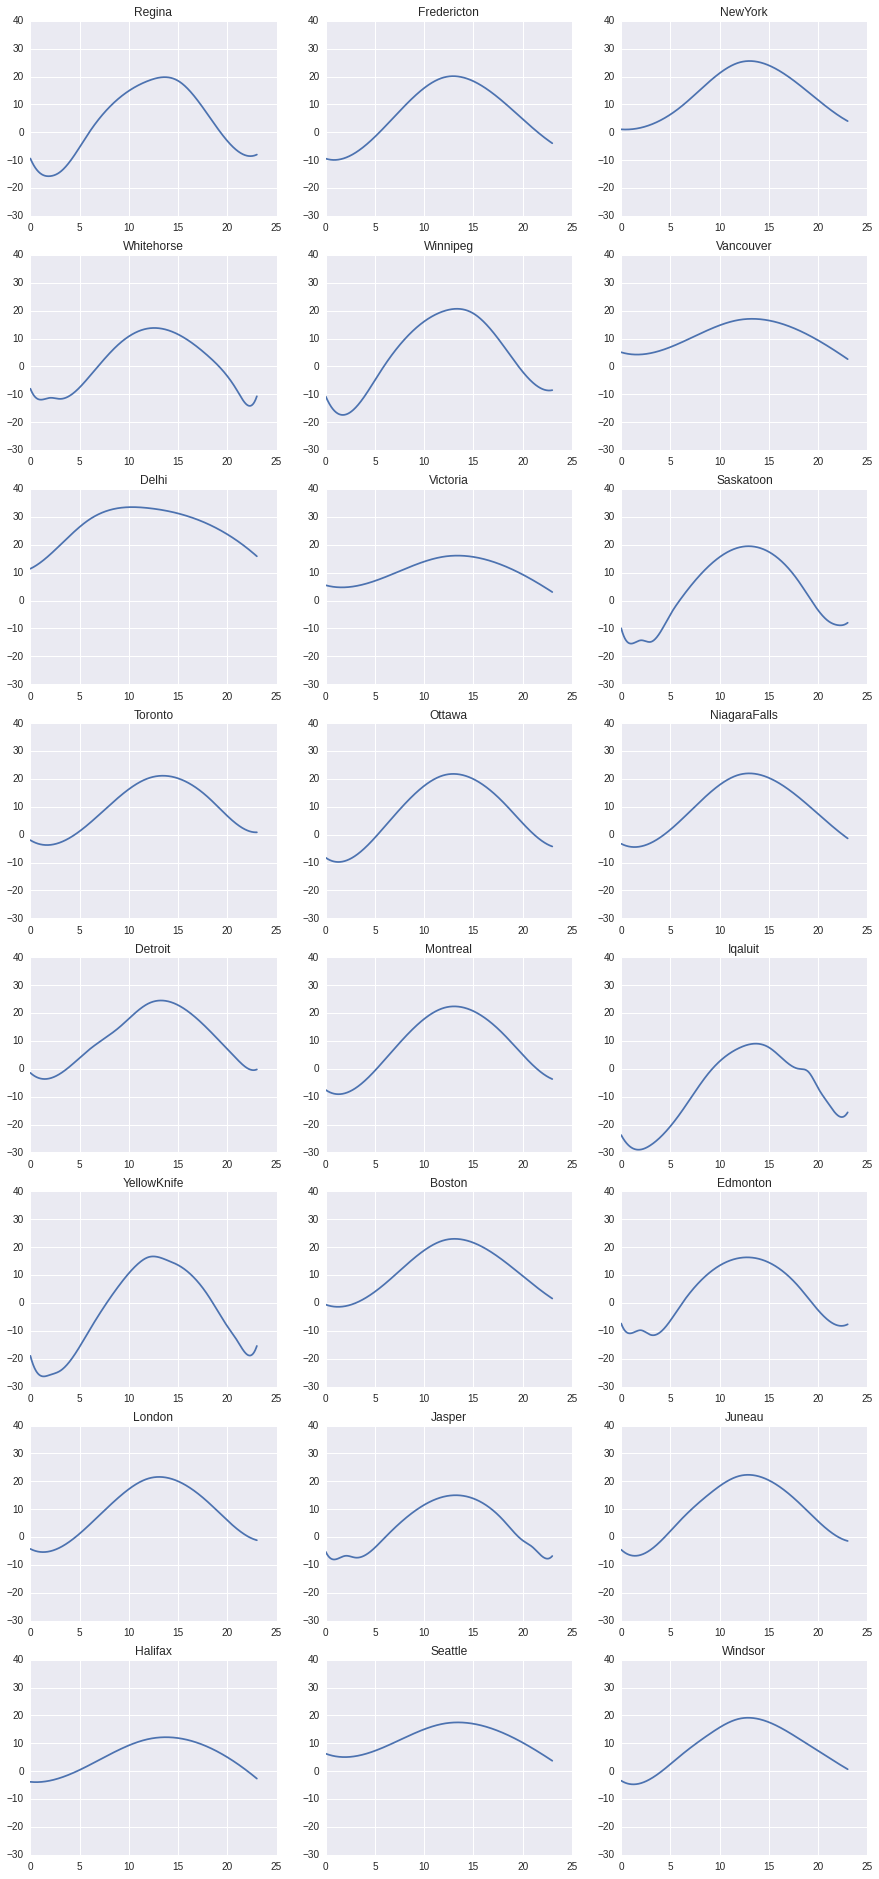

In [6]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (15, 100)

X_initial = []
cityMap = {}
k = 0
size = len(stationID)-2
city_curve = {}
for key in stationID:
    city = key
    code = stationID[key]
    curStationData = fda(initialYear,endyear,city,code)
    curX = curStationData.getFeatureVector()
    if curX is not None and len(curX) == 1000:
        x = np.linspace(0,23,1000)
        ax1 = subplot(size,3,k+1)
        ax1.plot(x,curX)
        ax1.set_ylim([-30,40])
        ax1.set_title(city)
#         ax1.grid()
        city_curve[city] = curX
        
        X_initial.append(curX)
        cityMap[k] = city
        k = k+1
        
sns.plt.plot()
    

### Visualizing graphs
Here we can see the smooth curves drawn from the functional data points. These are B-spline curves with third degree polynomial and suitable number of knots (to avoid noises). The key point here is that there are some plots with no curves/data points. It is because of unavilability of data for the mentioned given years. Therefore it won't get classified.

In [7]:
X = np.array(X_initial)

In [8]:
X.shape       # the initial shape of the predictor

(24, 1000)

### PCA
So after the dimensionality reduction through singualar vector decomposition, the dimension of the predictor reduced from 24 x 1000 to 24 x 24

In [9]:
from sklearn.decomposition import PCA


In [10]:
pca = PCA()

In [11]:
pca.fit(X)
X = pca.transform(X)
X.shape

(24, 24)

### Shape of the curve as a feature
Our classification also depends on the shape of the curve. So we are taking the shape as our feature vector of dimension equal to no of training examples

In [12]:
from sklearn import preprocessing
X_shape = preprocessing.scale(X_initial)
pca.fit(X_shape)
X_shape = pca.transform(X_shape)


In [13]:
X_final = []
n = X.shape[0]
for i in xrange(n):
    X_final.append(np.concatenate([X[i],X_shape[i]]))
X_final = np.array(X_final)


In [14]:
X_final.shape

(24, 48)

### K-Means
This is the unsupervised learning algorithm for clustering. Here we are taking the number of clusters as 2 (though we can take more than this depending upon situtation)

In [15]:
from sklearn.cluster import KMeans

In [16]:
est = KMeans(n_clusters=4)

In [17]:
est.fit(X_final)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [18]:
labels = est.labels_

In [19]:
city_class_map = {}
for num,label in enumerate(labels):
    city_class_map[cityMap[num]] = label

In [20]:
city_class_map

{'Boston': 1,
 'Delhi': 2,
 'Detroit': 1,
 'Edmonton': 3,
 'Fredericton': 1,
 'Halifax': 1,
 'Iqaluit': 0,
 'Jasper': 3,
 'Juneau': 1,
 'London': 1,
 'Montreal': 1,
 'NewYork': 1,
 'NiagaraFalls': 1,
 'Ottawa': 1,
 'Regina': 3,
 'Saskatoon': 3,
 'Seattle': 1,
 'Toronto': 1,
 'Vancouver': 1,
 'Victoria': 1,
 'Whitehorse': 3,
 'Windsor': 1,
 'Winnipeg': 3,
 'YellowKnife': 0}

[]

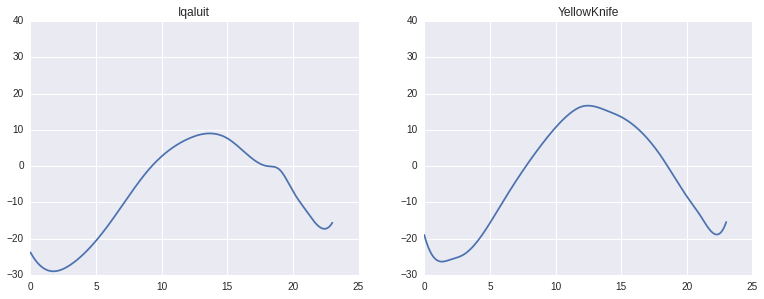

In [29]:
import matplotlib.pyplot as plt

class_a = [city for city in city_class_map if city_class_map[city] == 0]    # Members of class 0
size = len(class_a)
matplotlib.rcParams['figure.figsize'] = (20, 5*size)
for k,city in enumerate(class_a):
    x = np.linspace(0,23,1000)
    ax1 = subplot(size,3,k+1)
    ax1.plot(x,city_curve[city])
#     ax1.grid()
    ax1.set_ylim([-30,40])
    ax1.set_title(city)
sns.plt.plot()

[]

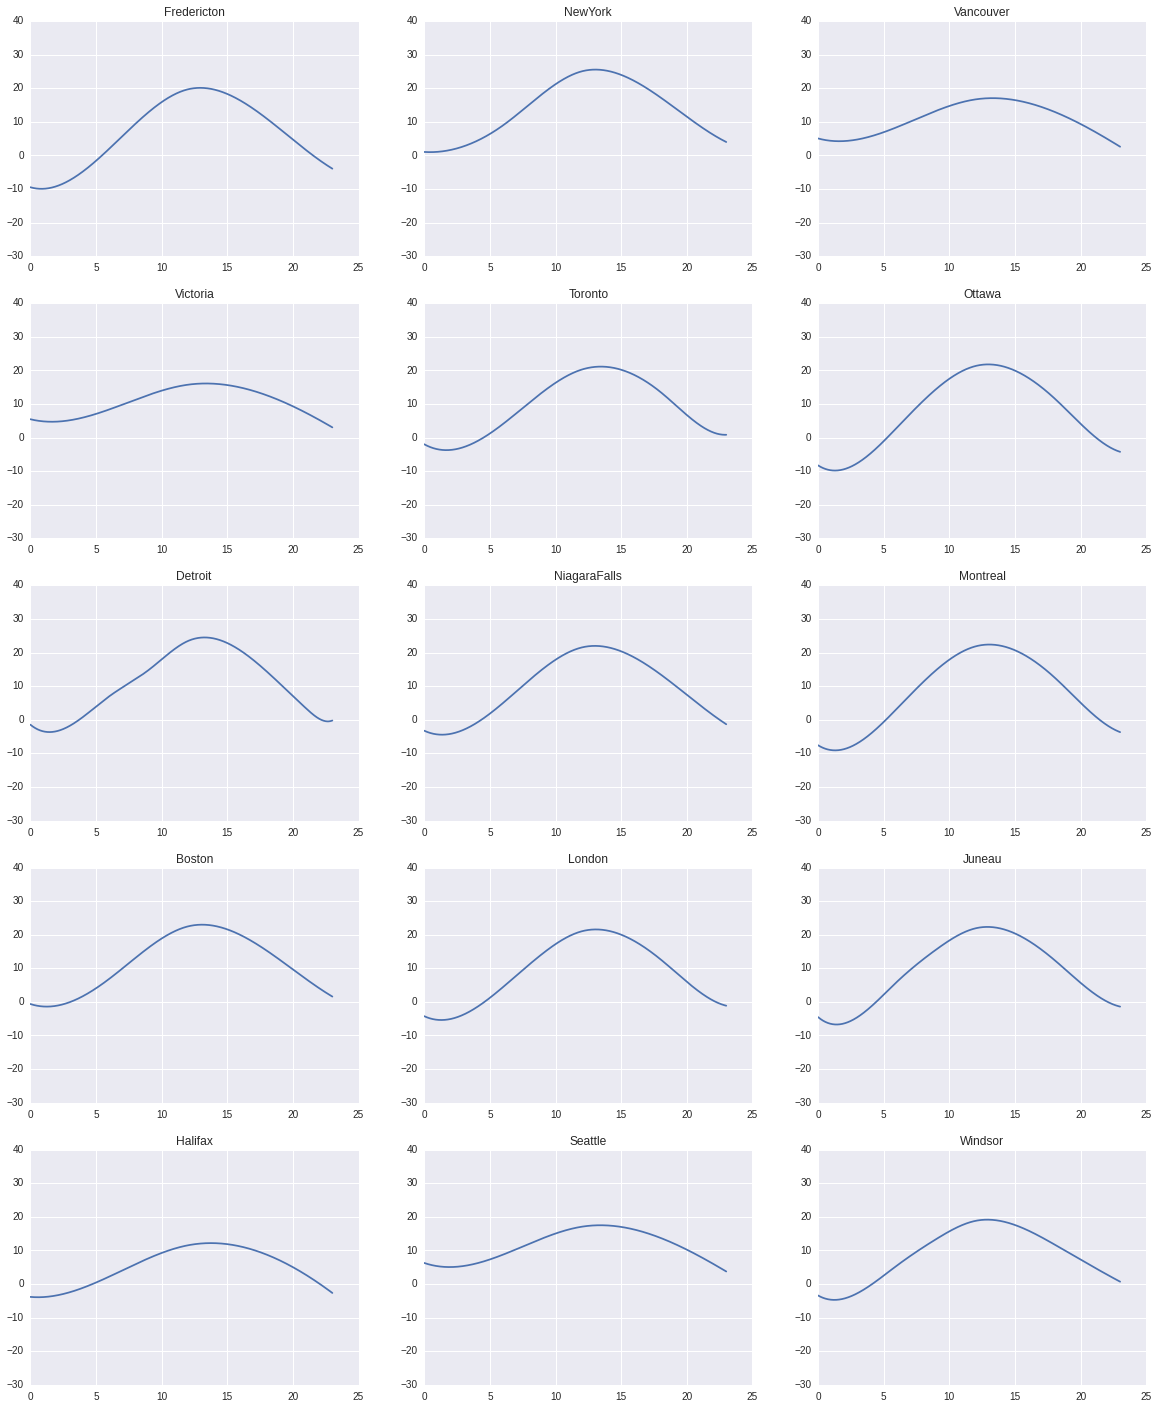

In [27]:
class_b = [city for city in city_class_map if city_class_map[city] == 1]    
size = len(class_b)
matplotlib.rcParams['figure.figsize'] = (20, 5*size)
for k,city in enumerate(class_b):
    x = np.linspace(0,23,1000)
#     fig = plt.figure(figsize=(8, 6)) 
    ax1 = plt.subplot(size,3,k+1)
    ax1.plot(x,city_curve[city])
#     ax1.grid()
    ax1.set_ylim([-30,40])
    ax1.set_title(city)
sns.plt.plot()

[]

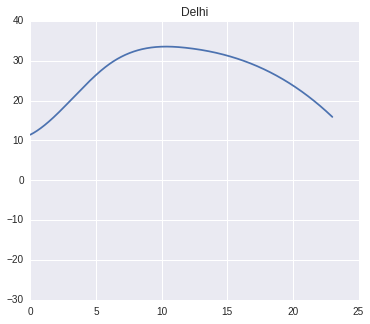

In [28]:
class_c = [city for city in city_class_map if city_class_map[city] == 2]    
size = len(class_c)
matplotlib.rcParams['figure.figsize'] = (20, 5*size)
for k,city in enumerate(class_c):
    x = np.linspace(0,23,1000)
#     fig = plt.figure(figsize=(8, 6)) 
    ax1 = plt.subplot(size,3,k+1)
    ax1.plot(x,city_curve[city])
#     ax1.grid()
    ax1.set_ylim([-30,40])
    ax1.set_title(city)
sns.plt.plot()

[]

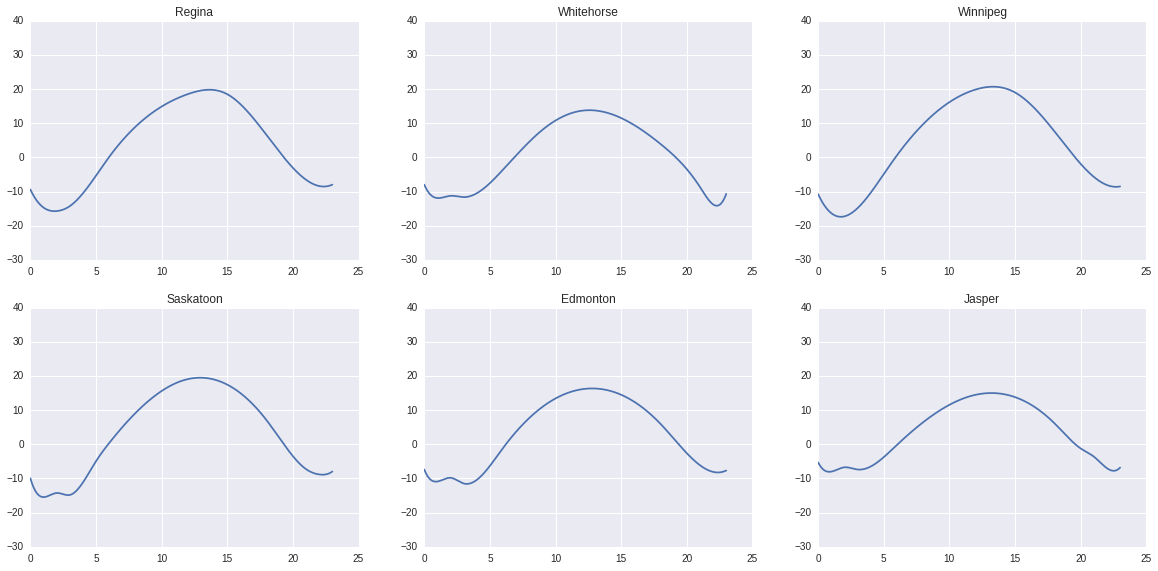

In [25]:
class_d = [city for city in city_class_map if city_class_map[city] == 3]    # Members of class 3
size = len(class_d)
matplotlib.rcParams['figure.figsize'] = (20, 5*size)
for k,city in enumerate(class_d):
    x = np.linspace(0,23,1000)
#     fig = plt.figure(figsize=(8, 6)) 
    ax1 = plt.subplot(size,3,k+1)
    ax1.plot(x,city_curve[city])
#     ax1.grid()
    ax1.set_ylim([-30,40])
    ax1.set_title(city)
sns.plt.plot()